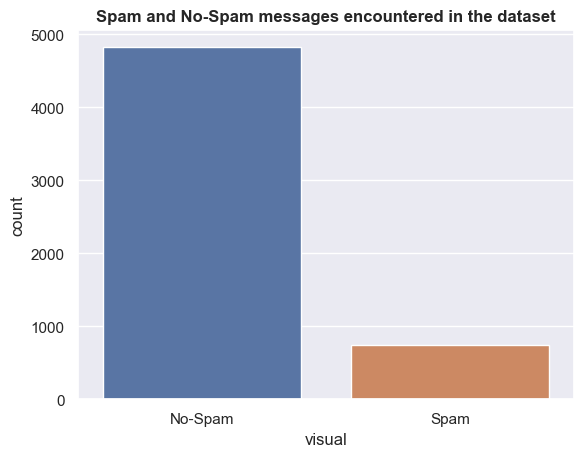

SVM Model Score: 0.9521531100478469


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

# Reading the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Drop unnecessary columns
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label","v2":"text"})

# Converting the labels(Categorical values) to Numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Adding a column to calculate and store the message length
df['length'] = df['text'].apply(len)

# Data Vizualization - creating a countplot
df['visual'] =  df['label'].map({0: 'No-Spam', 1: 'Spam'})
sns.set()
sns.countplot(data=df, x='visual').set_title("Spam and No-Spam messages encountered in the dataset", fontweight="bold")
plt.show()

# Splitting the data into train and test sets
X = df["text"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# Vectorizing the text data
cv = CountVectorizer(min_df=0.01, max_features=500, stop_words='english')
cv.fit(X_train)
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

# SVM Model implementation using rbf kernel gives the best results
#svm_model = SVC(kernel='linear') #0.9503588516746412
#svm_model = SVC(kernel='sigmoid', gamma='auto', coef0=0.0, random_state=42) #0.909688995215311
#svm_model = SVC(kernel='poly', degree=3, gamma='auto', coef0=1, random_state=42) #0.9294258373205742
svm_model = SVC(kernel='rbf') # 0.9521531100478469
svm_model.fit(X_train, y_train)

# Evaluate the model
print("SVM Model Score:", svm_model.score(X_test, y_test))

# Prediction function
def classifier_svm(message):
    transformed = cv.transform([message])
    prediction = svm_model.predict(transformed)    
    if prediction == 0:
        return "This message is not spam!"
    else:
        return "This message is spam!"